In [196]:
%pwd

'D:\\Data Science\\Hackthon\\Rolls-Royce'

## Revision History

Update with your details here

Name: Mayank Mohan Pandey(mayankmohanpandey@gmail.com)

Date: 11th Sept 2021

## Basic problem statement 
Explore, understand and build on what factors influence energy consumption – for appliances and light - using the provided data for a house in Belgium. 

If it is feasible and/or required to build a model 
- can you outline the approach, 
- build a proof of concept model with the available data and 
- architect a scenario where/how the model could be used. 

Please answer below questions based on your understanding
- How can we improve this perceived system?
- what challenges do you see in deploying this system?
- can you propose a timeline based on this PoC for this development?

Please use the notebook to record your thought process and code. Once you have performed the assessment, respond back with your solution in 3 days. You will be required to walk through the notebook in a technical discussion. 

A basic workflow is defined via code comments, which you may use. Please ensure to include your references in the last cell. 

## Data Set Information

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column.

Data repository : [link](http://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv)

## Attribute Information
* date : time year-month-day hour:minute:second
* Appliances, energy use in Wh 
* lights, energy use of light fixtures in the house in Wh 
* T1, Temperature in kitchen area, in Celsius 
* RH_1, Humidity in kitchen area, in % 
* T2, Temperature in living room area, in Celsius 
* RH_2, Humidity in living room area, in % 
* T3, Temperature in laundry room area 
* RH_3, Humidity in laundry room area, in % 
* T4, Temperature in office room, in Celsius 
* RH_4, Humidity in office room, in % 
* T5, Temperature in bathroom, in Celsius 
* RH_5, Humidity in bathroom, in % 
* T6, Temperature outside the building (north side), in Celsius 
* RH_6, Humidity outside the building (north side), in % 
* T7, Temperature in ironing room , in Celsius 
* RH_7, Humidity in ironing room, in % 
* T8, Temperature in teenager room 2, in Celsius 
* RH_8, Humidity in teenager room 2, in % 
* T9, Temperature in parents room, in Celsius 
* RH_9, Humidity in parents room, in % 
* To, Temperature outside (from Chievres weather station), in Celsius 
* Pressure (from Chievres weather station), in mm Hg 
* RH_out, Humidity outside (from Chievres weather station), in % 
* Wind speed (from Chievres weather station), in m/s 
* Visibility (from Chievres weather station), in km 
* Tdewpoint (from Chievres weather station), in Deg C

In [142]:
## The libraries you use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from math import sqrt

import statsmodels.api as sml
from statsmodels import tools

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LinearRegression
import xgboost as xgb


import os
os.chdir("D:\\Data Science\\Hackthon\\Rolls-Royce")

import warnings
warnings.filterwarnings("ignore")

## Read data and basic data clean-up

In [143]:
energy_data = pd.read_csv("energydata_complete.csv")
energy_data.drop(['date','rv1','rv2'],inplace=True,axis=1)
energy_data = energy_data.drop_duplicates(keep='first')

## strategy for missing value treatment

In [144]:
energy_data.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
dtype: int64

## Data exploration

In [145]:
energy_data.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9


In [146]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19735 entries, 0 to 19734
Data columns (total 26 columns):
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 non-null float64
Windspeed      19735 

In [147]:
energy_data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000


In [148]:
#checing correlation
corr = energy_data.corr().unstack()
corr = corr[corr.index.get_level_values(0) != corr.index.get_level_values(1)].sort_values(ascending=False)[0:15]
#corr.to_csv("correlation.csv")
print(corr)

T_out  T6       0.974787
T6     T_out    0.974787
T7     T9       0.944776
T9     T7       0.944776
T5     T9       0.911055
T9     T5       0.911055
T3     T9       0.901324
T9     T3       0.901324
RH_3   RH_4     0.898978
RH_4   RH_3     0.898978
       RH_7     0.894301
RH_7   RH_4     0.894301
T3     T1       0.892402
T1     T3       0.892402
T4     T9       0.889439
dtype: float64


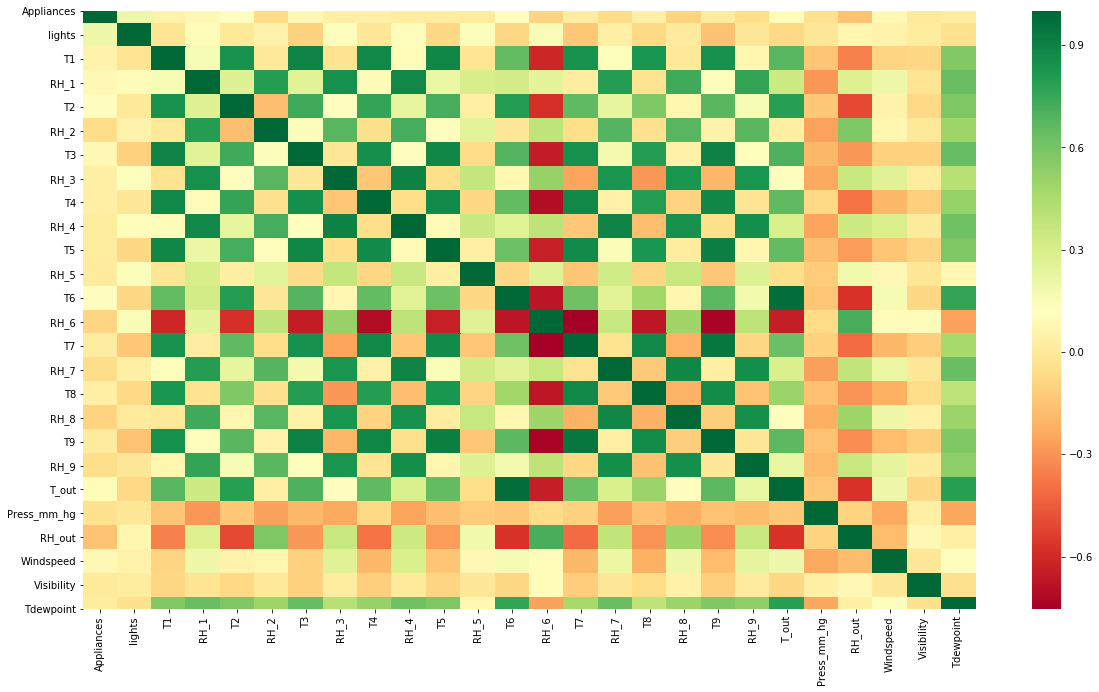

In [149]:
#heatmap
plt.subplots(figsize=(20,11))
sns.heatmap(energy_data.corr(),cmap='RdYlGn')

In [150]:
#dropping correlated columns
energy_data.drop(['T6','T9','Visibility'],inplace=True,axis=1)

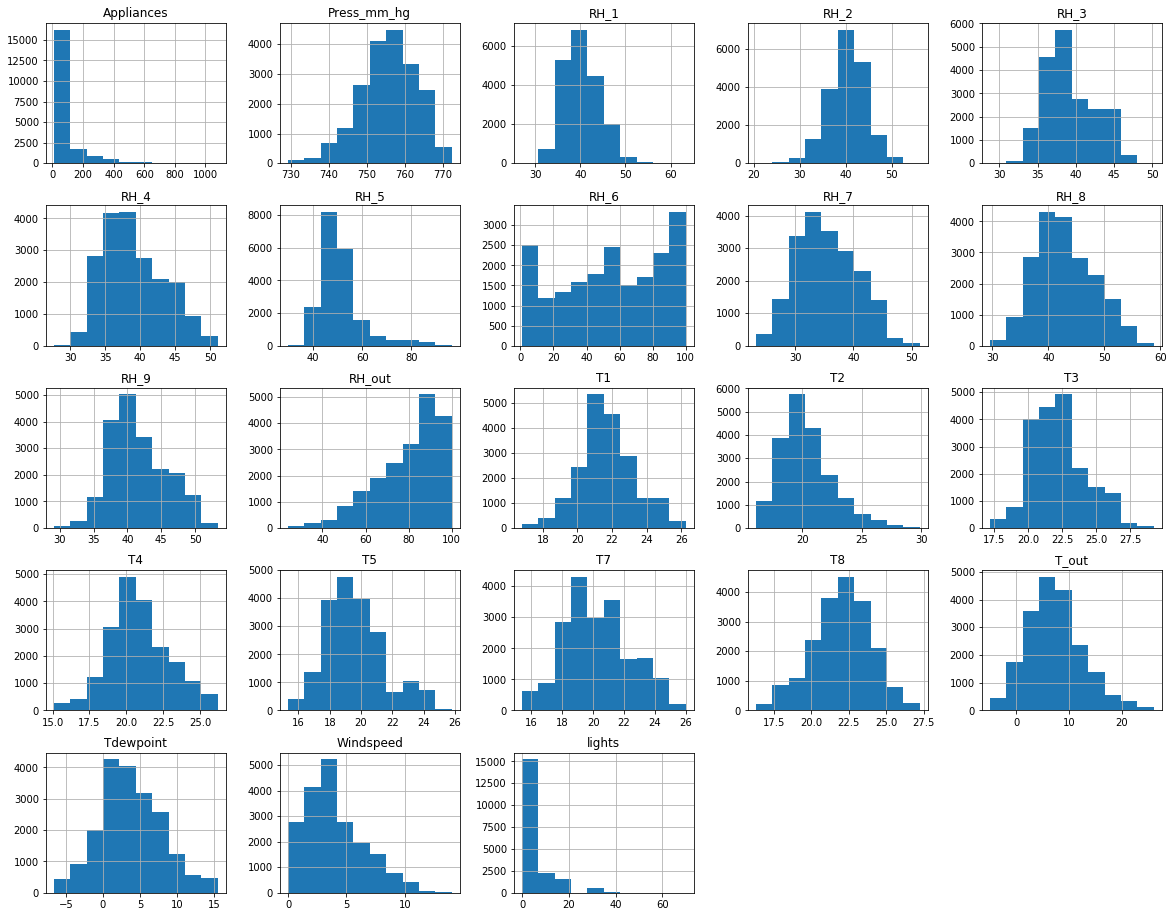

In [151]:
# Histogram of all the features to understand the distribution
energy_data.hist(figsize= (20,16));

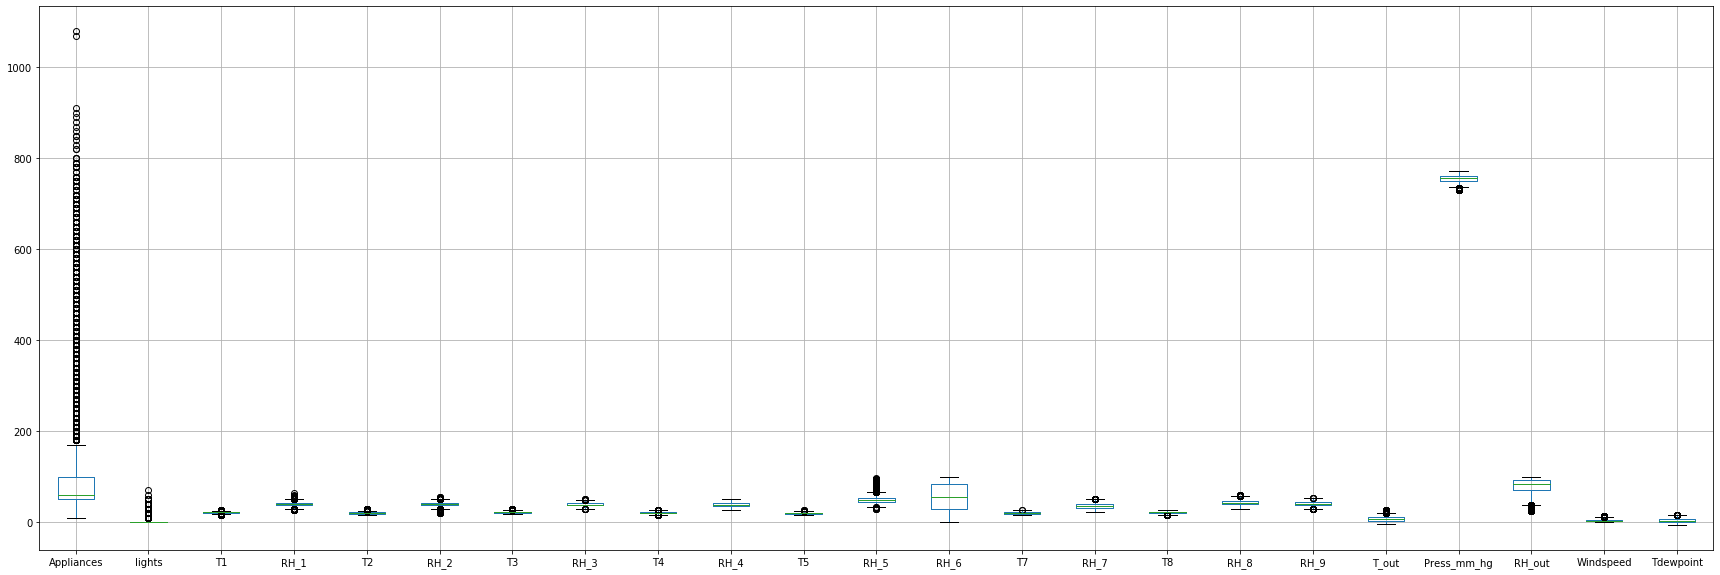

In [152]:
#checking outlier
energy_data.boxplot(figsize= (30,10));

In [153]:
# checking
q1 = energy_data.quantile(0.25)
q3 = energy_data.quantile(0.75)
iqr = q3-q1
low= q1-1.5*iqr
high=q3+1.5*iqr

quartile_table = {'q1':q1,'q3':q3,'iqr':iqr,'lower':low,'upper':high}
print(pd.DataFrame(quartile_table) )

                     q1          q3        iqr       lower       upper
Appliances    50.000000  100.000000  50.000000  -25.000000  175.000000
lights         0.000000    0.000000   0.000000    0.000000    0.000000
T1            20.760000   22.600000   1.840000   18.000000   25.360000
RH_1          37.333333   43.066667   5.733333   28.733333   51.666667
T2            18.790000   21.500000   2.710000   14.725000   25.565000
RH_2          37.900000   43.260000   5.360000   29.860000   51.300000
T3            20.790000   23.290000   2.500000   17.040000   27.040000
RH_3          36.900000   41.760000   4.860000   29.610000   49.050000
T4            19.530000   22.100000   2.570000   15.675000   25.955000
RH_4          35.530000   42.156667   6.626667   25.590000   52.096667
T5            18.277500   20.619643   2.342143   14.764286   24.132857
RH_5          45.400000   53.663333   8.263333   33.005000   66.058333
RH_6          30.025000   83.226667  53.201667  -49.777500  163.029167
T7    

In [154]:
#checking light column
energy_data['lights'].value_counts()/len(energy_data)*100

0     77.284013
10    11.208513
20     8.229035
30     2.832531
40     0.390170
50     0.045604
60     0.005067
70     0.005067
Name: lights, dtype: float64

In [155]:
# dropping lights columns as it has more than 77% 0 sensor reading
energy_data.drop('lights',inplace=True,axis=1)

## key insights

1. Temperature columns follows normal distribution, except T9
2. Ouside sensor RH_6 and RH_out are not normally distributed
3. Appliance have mean around 100 Wh, outlier are present
4. Visibilty - Outliers are present
5. All the temperature variables from T1-T9 and T_out have positive correlation with the target Appliances . 
6. a)High correlation between T9 — T3,T5,T7,T8 
   b)T6 & T_Out has high correlation
7. Humidity sesnors have no significant correlation
8. Visibility, Tdewpoint, Press_mm_hg have low correlation with appliances
9. Light column is not useful due to low fill rate
10. Hence T6 & T9 can be removed from training set as information provided by them can be provided by other fields.

# model feasibility
# feature engineering
## model explainability

In [156]:


########Appliance#######################

X_appl = energy_data[energy_data.columns.difference(['Appliances','lights'])]
y_appl = energy_data[['Appliances']]

X_train_appl, X_test_appl, y_train_appl, y_test_appl = train_test_split(X_appl, y_appl, test_size = 0.2, random_state = 0)

sc=StandardScaler()

#scaling appliance
sc_X_train_appl = pd.DataFrame(columns=X_train_appl.columns , index=X_train_appl.index)
sc_X_train_appl[sc_X_train_appl.columns] = sc.fit_transform(X_train_appl)##X
sc_y_train_appl = pd.DataFrame(columns=y_train_appl.columns , index=y_train_appl.index)
sc_y_train_appl[sc_y_train_appl.columns] = sc.fit_transform(y_train_appl)##y


sc_X_test_appl= pd.DataFrame(columns=X_test_appl.columns , index=X_test_appl.index)
sc_X_test_appl[sc_X_test_appl.columns] = sc.fit_transform(X_test_appl)##X
sc_y_test_appl = pd.DataFrame(columns=y_test_appl.columns , index=y_test_appl.index)
sc_y_test_appl[sc_y_test_appl.columns] = sc.fit_transform(y_test_appl)##y


####model##
#Regression

regressor = LinearRegression()
regressor.fit(sc_X_train_appl, sc_y_train_appl)

#xgboost

boost = xgb.XGBRegressor()
boost.fit(sc_X_train_appl, sc_y_train_appl)

#performance

X_train_preds_appl = boost.predict(sc_X_train_appl)
X_test_preds_appl = boost.predict(sc_X_test_appl)

print('train mse: {}'.format(mean_squared_error(sc_y_train_appl, X_train_preds_appl)))
print('train rmse: {}'.format(sqrt(mean_squared_error(sc_y_train_appl, X_train_preds_appl))))
print('train r2: {}'.format(r2_score(sc_y_train_appl, X_train_preds_appl)))
print()
print('test mse: {}'.format(mean_squared_error(sc_y_test_appl, X_test_preds_appl)))
print('test rmse: {}'.format(sqrt(mean_squared_error(sc_y_test_appl, X_test_preds_appl))))
print('test r2: {}'.format(r2_score(sc_y_test_appl, X_test_preds_appl)))



train mse: 0.15667713226136218
train rmse: 0.39582462311150146
train r2: 0.8433228677386378

test mse: 0.591581222364708
test rmse: 0.7691431741650627
test r2: 0.4084187776352919


# model iterations and selection

In [192]:
#Xgboost for Appliance


#################################Appliance##################################################
parameters = { 
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], 
              'max_depth': [5, 6, 7],
              'min_child_weight': [2,4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [50,100,500]}

xgb_grid = GridSearchCV(boost,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)
xgb_grid.fit(sc_X_train_appl, sc_y_train_appl)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 54 candidates, totalling 108 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   34.9s
[Parallel(n_jobs=5)]: Done 108 out of 108 | elapsed:  1.9min finished


0.4514640495476666
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [195]:
# R2 score 
xgb_grid.best_estimator_.score(sc_X_test_appl,sc_y_test_appl)

0.48728944987795486

In [193]:
imp_feature = []
colname= list(X_train_appl.columns)
for i, f in zip(colname, xgb_grid.best_estimator_.feature_importances_):
    imp_feature.append([i,f])
    #print(i,round(f*100,2))
    
imp_feature = pd.DataFrame(imp_feature,columns=['Features','imp']).sort_values(by='imp',ascending=False)
print(imp_feature)

       Features       imp
15           T5  0.060729
14           T4  0.055864
10       RH_out  0.054874
13           T3  0.052908
16           T7  0.052548
9          RH_9  0.049893
11           T1  0.049189
18        T_out  0.048519
2          RH_2  0.047926
6          RH_6  0.046751
1          RH_1  0.046580
3          RH_3  0.046429
17           T8  0.044998
8          RH_8  0.044983
7          RH_7  0.044523
4          RH_4  0.042527
19    Tdewpoint  0.042476
20    Windspeed  0.042392
12           T2  0.042310
0   Press_mm_hg  0.041866
5          RH_5  0.041716


T5, T7,T4,T3,RH_Out are importance feature 

## Summary and next steps

XgBoost regressor Algorithm used, as it perform better than Linear Regression.

On test data: Tuned model performed better then untuned by 9%
Untuned model = 40 % of variance 
Tuned Model = 49% of variance


Please answer below questions based on your understanding
- How can we improve this perceived system? 
Ans- a. Perform further feature engineer
     b. Test other Algorithms
     c. Add more paramter in the grid search with various value
     d. Add more records--
- what challenges do you see in deploying this system?
Ans- Missing value treatment in light feature--if we need to really undertand and predict future usage
     Identify genuine outliers on real time
- can you propose a timeline based on this PoC for this development?
Ans-  4-6weeks

## References (add your references below)
[1] Luis M. Candanedo, Veronique Feldheim, Dominique Deramaix, Data driven prediction models of energy use of appliances in a low-energy house, Energy and Buildings, Volume 140, 1 April 2017, Pages 81-97, ISSN 0378-7788,

[2] Python documentation